# Norms

## Vector norms

The contour lines of the major $p$-norms give some idea of the metric structure created by the norms. The 2-norm corresponds to Euclidean distance, so the level cuves in 2D are regular circles. 

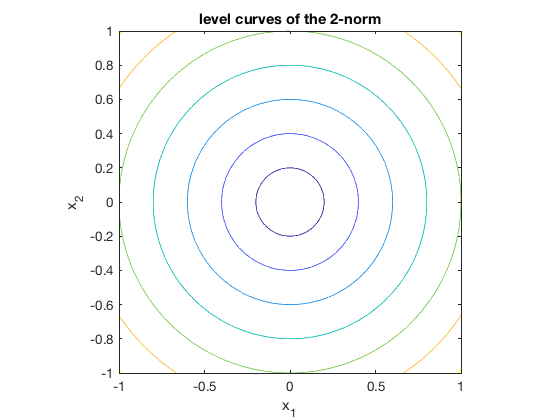

In [1]:
x = (-1:0.025:1)';
y = x';
contour(x,y,sqrt(x.^2 + y.^2));
axis equal
title("level curves of the 2-norm");
xlabel("x_1"); ylabel("x_2");

In the 1-norm, the "circles" are actually squares whose diagonals align with the coordinate axes.

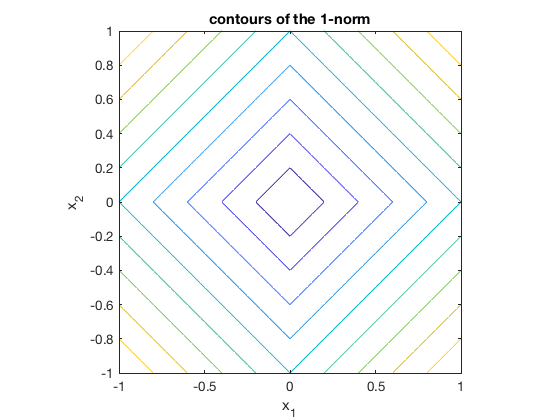

In [2]:
contour(x,x,abs(x) + abs(y));
axis equal
title("contours of the 1-norm");
xlabel("x_1"); ylabel("x_2");

And in the infinity norm, we get squares again, but with axes-aligned sides. 

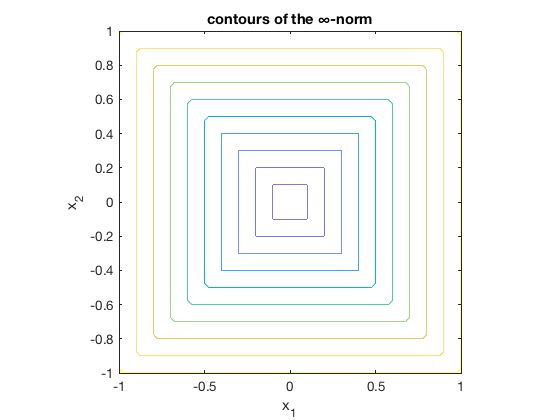

In [3]:
contour(x,x,max(abs(x)+0*y,abs(y)+0*x));
axis equal
title("contours of the ∞-norm");
xlabel("x_1"); ylabel("x_2");

We won't use them, but the $p$-norms do vary smoothly at intermediate values of $p$.

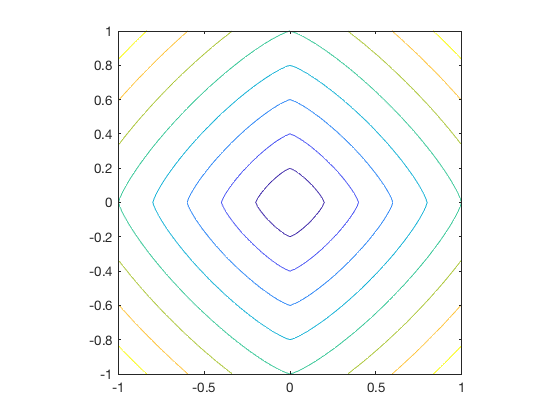

In [4]:
p = 1.25;
contour(x,y,(abs(x).^p + abs(y).^p).^(1/p));
axis equal

## Induced matrix norms

A matrix norm is the maximum of $\|Ax\|$ over all unit vectors $x$. 

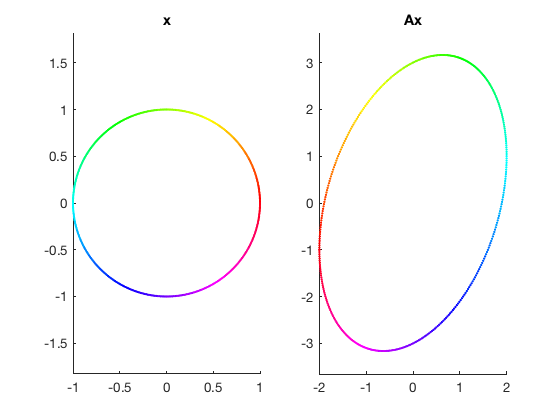

In [5]:
A = [-2 0; -1 3];
t = (0:pi/200:2*pi)';
x1 = cos(t);  
x2 = sin(t);
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,t,".") 
axis equal
title("x")
subplot(1,2,2)
scatter(Ax(1,:),Ax(2,:),20,t,".")
axis equal
title("Ax")
colormap hsv

Here's a visualization of the maximization that defines the matrix norm.

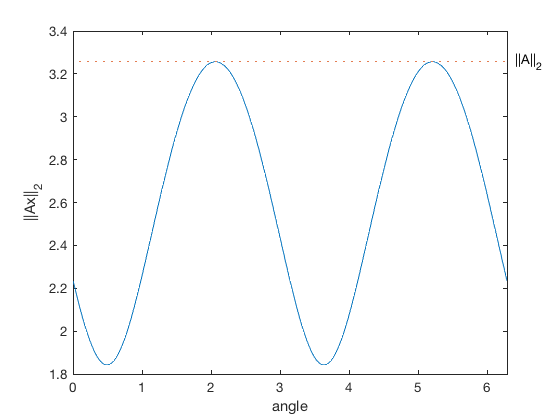

In [6]:
plot(t,sqrt(sum(Ax.^2,1)))
xlim([0,2*pi]);
xlabel("angle");
ylabel("||Ax||_2");
hold on, plot([0; 2*pi],norm(A)*[1;1],":");
text(6.4,norm(A),"||A||_2");

Repeating this process in the infinity norm is similar, just with a bit more effort to parameterize the "unit circle".

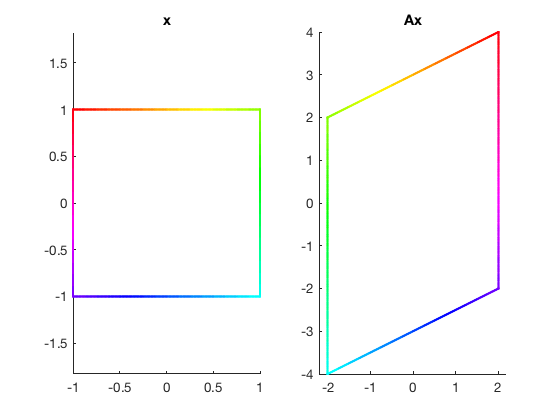

In [7]:
t = (-1:0.01:1)';  
o = ones(size(t));
x1 = [t;o;-t;-o];  
x2 = [o;-t;-o;t];
Ax = A*[x1';x2'];
subplot(1,2,1)
scatter(x1,x2,20,1:length(x1),".") 
axis equal
title("x")
subplot(1,2,2)
scatter(Ax(1,:),Ax(2,:),20,1:length(x1),".")
axis equal
title("Ax")
colormap hsv

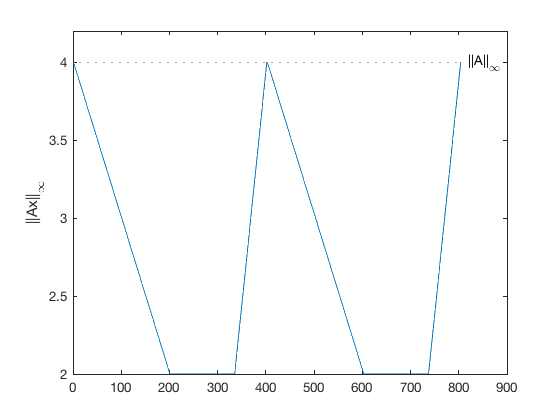

In [8]:
plot(max(abs(Ax),[],1));
ylabel("||Ax||_{\infty}")
hold on, plot([1;810],norm(A,Inf)*[1;1],":")
text(820,norm(A,Inf),"||A||_{\infty}")
ylim([2,4.2])

## Unitary matrices

A unitary matrix has 2-norm equal to one, i.e., it preserves all Euclidean distances.

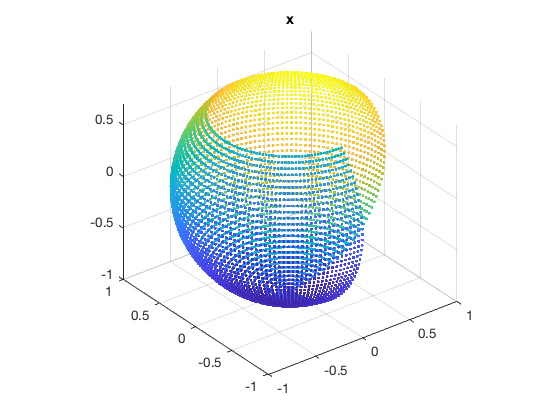

In [9]:
phi = (0:pi/80:1.5*pi)'; theta = (pi/4:pi/60:pi)';
X1 = sin(theta).*cos(phi'); X2 = sin(theta).*sin(phi'); X3 = cos(theta).*(phi').^0;
x = [X1(:)'; X2(:)'; X3(:)'];
[Q,~] = qr(rand(3,3));
Qx = Q*x;

scatter3(x(1,:),x(2,:),x(3,:),40,sum(x),".")
title("x"); axis equal

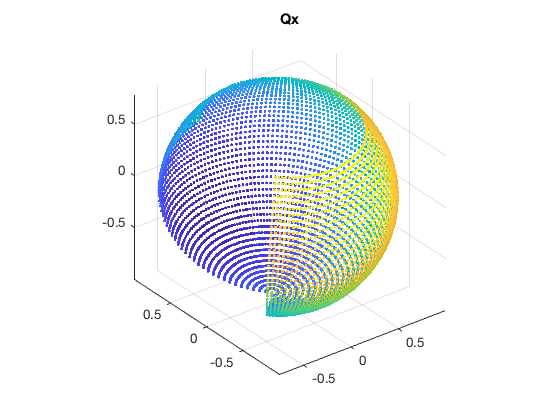

In [10]:
scatter3(Qx(1,:),Qx(2,:),Qx(3,:),40,sum(x),".")
title("Qx"); axis equal


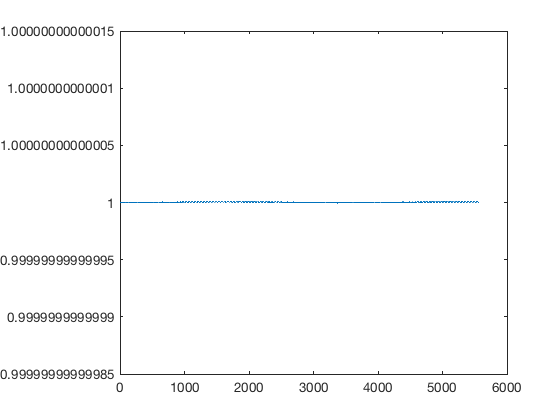

In [11]:
plot(sum(Qx.^2,1));